<a href="https://colab.research.google.com/github/leegyuhi/19-lab/blob/master/DL_Ch_4_3~5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.3 수치 미분
### 4.3.1 미분

$\frac{df(x)}{dx}=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h}$

In [0]:
def numerical_diff(f,x):
  h=10e-50
  return (f(x+h)-f(x))/h

In [3]:
import numpy as np

np.float32(1e-50)

0.0

In [0]:
def function_1(x):
  return 0.01*x**2+0.1*x

In [6]:
numerical_diff(function_1,5)

0.0

In [0]:
def numerical_diff(f,x):
  h=1e-4
  return (f(x+h)-f(x-h))/(2*h)

$\frac{df(x)}{dx}=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x-h)}{2h}$

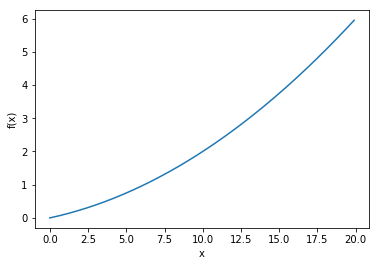

In [7]:
import numpy as np
import matplotlib.pylab as plt

x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [10]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


### 4.3.3 편미분

In [0]:
def function_2(x):
  return x[0]**2+x[1]**2

In [12]:
def function_tmp1(x0):
  return x0**2+4.0**2.0
numerical_diff(function_tmp1,3.0)

6.00000000000378

In [14]:
def function_tmp2(x1):
  return 3.0**2.0+x1**2
numerical_diff(function_tmp2,4.0)

7.999999999999119

## 4.4 기울기

In [0]:
def numerical_gradient(f,x):
  h=1e-4
  grad=np.zeros_like(x)
  
  for idx in range(x.size):
    tmp_val=x[idx]
    
    x[idx]=tmp_val+h
    fxh1=f(x)
    
    x[idx]=tmp_val-h
    fxh2=f(x)
    
    grad[idx]=(fxh1-fxh2)/(2*h)
    x[idx]=tmp_val
    
  return grad

In [18]:
print(numerical_gradient(function_2,np.array([3.0,4.0])))
print(numerical_gradient(function_2,np.array([0.0,2.0])))
print(numerical_gradient(function_2,np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [26]:
x=np.array([3.0,4.0])
grad=np.zeros_like(x)
print(grad)
h=1e-4
f=function_2
  
for idx in range(x.size):
    tmp_val=x[idx]
    print(tmp_val)
    
    x[idx]=tmp_val+h
    fxh1=f(x)
    print(fxh1)
    
    x[idx]=tmp_val-h
    fxh2=f(x)
    print(fxh2)
    
    grad[idx]=(fxh1-fxh2)/(2*h)
    x[idx]=tmp_val
    print(x[idx])
    print(grad)

[0. 0.]
3.0
25.00060001
24.99940001
3.0
[6. 0.]
4.0
25.00080001
24.99920001
4.0
[6. 8.]


### 4.4.1 경사법(경사하강법)

In [0]:
def gradient_descent(f,init_x,lr=0.01, step_num=100):
  x=init_x
  
  for i in range(step_num):
    grad=numerical_gradient(f,x)
    x -= lr*grad
  return x

In [28]:
def function_2(x):
  return np.sum(x**2)

init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

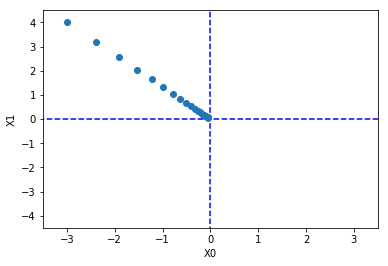

In [36]:
import numpy as np
import matplotlib.pylab as plt

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [34]:
init_x=np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [35]:
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

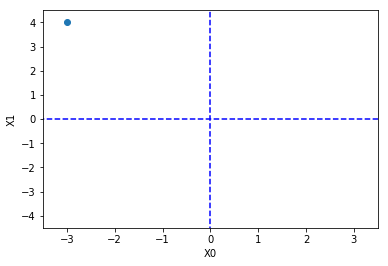

In [37]:
init_x = np.array([-3.0, 4.0])    

lr = 10.0
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

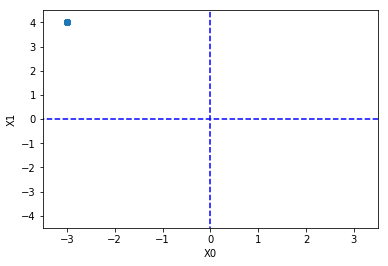

In [38]:
init_x = np.array([-3.0, 4.0])    

lr = 1e-10
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2 신경망에서의 기울기

In [0]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))
  
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [49]:
net=simpleNet()
print(net.W)

[[-0.43661102 -1.18400127 -0.26695783]
 [-0.30723178 -1.37523504 -0.24199871]]


In [50]:
x=np.array([0.6,0.9])
p=net.predict(x)
print(p)

print(np.argmax(p))

[-0.53847522 -1.9481123  -0.37797354]
2


In [51]:
t=np.array([0,0,1])
net.loss(x,t)

0.7225760163013364

In [52]:
def f(W):
  return net.loss(x,t)

dW=numerical_gradient(f,net.W)
print(dW)

[[ 0.24810488  0.06059513 -0.3087    ]
 [ 0.37215732  0.09089269 -0.46305001]]


In [55]:
f=lambda w: net.loss(x,t)
dW=numerical_gradient(f,net.W)
print(dW)

[[ 0.24810488  0.06059513 -0.3087    ]
 [ 0.37215732  0.09089269 -0.46305001]]


## 4.5 학습 알고리즘 구현하기
### 4.5.1 2층 신경망 클래스 구현하기

In [0]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
      
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
        

In [64]:
net=TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [65]:


x=np.random.rand(100,784)
t=np.random.rand(100,10)

grads=net.numerical_gradient(x,t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [68]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/dataset')

import mnist
from mnist import load_mnist

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)


# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

In [78]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
        # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.78495, 0.7931
train acc, test acc | 0.8762166666666666, 0.8817
train acc, test acc | 0.8968, 0.9011
train acc, test acc | 0.9076666666666666, 0.9113
train acc, test acc | 0.9150666666666667, 0.9157
train acc, test acc | 0.9195333333333333, 0.9204
train acc, test acc | 0.9244833333333333, 0.9254
train acc, test acc | 0.9269333333333334, 0.9289
train acc, test acc | 0.9307666666666666, 0.9302
train acc, test acc | 0.9337666666666666, 0.9339
train acc, test acc | 0.9370166666666667, 0.936
train acc, test acc | 0.9393166666666667, 0.9372
train acc, test acc | 0.94175, 0.94
train acc, test acc | 0.9438333333333333, 0.9413
train acc, test acc | 0.9461, 0.9411
train acc, test acc | 0.9477833333333333, 0.9429


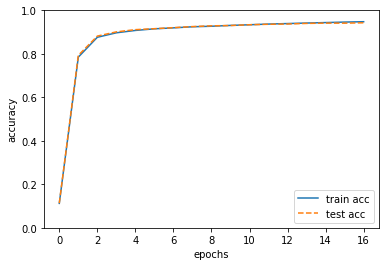

In [79]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()